In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import scipy.io as sio
%matplotlib inline

In [6]:
#loading .mat format data
raw_data=sio.loadmat('ex6data2.mat')

In [7]:
dt = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])  
dt['y'] = raw_data['y']

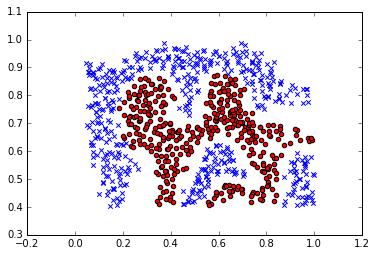

In [8]:
for i in range(dt.shape[0]):
    if dt.iloc[i,2]==0:
        plt.scatter(dt.iloc[i,0],dt.iloc[i,1],c='red',marker='o')
    if dt.iloc[i,2]==1:
        plt.scatter(dt.iloc[i,0],dt.iloc[i,1],c='blue',marker='x')


For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.

In [10]:
from sklearn import svm  
svc = svm.SVC(C=100, gamma=10, probability=True)  
svc.fit(dt[['X1', 'X2']], dt['y'])  
dt['Probability'] = svc.predict_proba(dt[['X1', 'X2']])[:,0]

In [12]:
dt.head()

,X1,X2,y,Probability
0,0.107143,0.603070,1,3.000001e-14
1,0.093318,0.649854,1,3.000001e-14
2,0.097926,0.705409,1,3.000001e-14
3,0.155530,0.784357,1,6.519815e-07
4,0.210829,0.866228,1,5.436261e-03


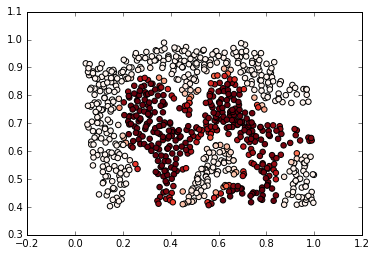

In [13]:
plt.scatter(dt['X1'], dt['X2'], s=30, c=dt['Probability'], cmap='Reds') 

The shaded points are based on the predicted probability that the instance has a negative class label